# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(f"How many rows and columns does the dataset contain? {data.shape}\n")

print(f"Are there any NaN values present? {data.isna().values.any()}\n")

print(f"Are there any duplicate rows? {data.duplicated().values.any()}\n")

print(f"What are the data types of the columns?\n{data.dtypes}\n")

print(data.head())
print(data.tail())
print(data.info())
print(data.sample())

How many rows and columns does the dataset contain? (5391, 6)

Are there any NaN values present? False

Are there any duplicate rows? False

What are the data types of the columns?
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

   Rank Release_Date                     Movie_Title USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation              $110,000   
1  5140     5/9/1916                     Intolerance              $385,907   
2  5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3  5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4  5222     1/1/1925                  The Big Parade              $245,000   

  USD_Worldwide_Gross USD_Domestic_Gross  
0         $11,000,000        $10,000,000  
1                  $0                 $0  
2          $8,

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [5]:
# Convert the USD_Production_Budget to a numeric format
data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(str).str.replace('$', '')
data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(str).str.replace(',', '')
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])

# Convert the USD_Worldwide_Gross to a numeric format
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].astype(str).str.replace('$', '')
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].astype(str).str.replace(',', '')
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'])

# Convert the USD_Domestic_Gross to a numeric format
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].astype(str).str.replace('$', '')
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].astype(str).str.replace(',', '')
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'])

data.head()

<ipython-input-5-45d07cddc8d6>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(str).str.replace('$', '')
<ipython-input-5-45d07cddc8d6>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].astype(str).str.replace('$', '')
<ipython-input-5-45d07cddc8d6>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].astype(str).str.replace('$', '')


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [6]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])

data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [7]:
print(f"What is the average production budget of the films in the data set? {data['USD_Production_Budget'].mean()}\n")

print(f"What is the average worldwide gross revenue of films? {data['USD_Worldwide_Gross'].mean()}\n")

print(f"What was the minimum for worldwide gross revenue? {data['USD_Worldwide_Gross'].min()}\n")

print(f"What was the minimum for domestic gross revenue? {data['USD_Domestic_Gross'].min()}\n")

print(f"What is the highest production budget of any film? {data['USD_Production_Budget'].max()}\n")

print(f"What is the highest worldwide gross revenue of any film? {data['USD_Worldwide_Gross'].max()}\n")

print(f"How much revenue did the lowest budget film make? {data['USD_Worldwide_Gross'].loc[data['USD_Production_Budget'].idxmin()]}\n")

print(f"How much revenue did the highest budget film make? {data['USD_Worldwide_Gross'].loc[data['USD_Production_Budget'].idxmax()]}\n")


What is the average production budget of the films in the data set? 31113737.57837136

What is the average worldwide gross revenue of films? 88855421.96271564

What was the minimum for worldwide gross revenue? 0

What was the minimum for domestic gross revenue? 0

What is the highest production budget of any film? 425000000

What is the highest worldwide gross revenue of any film? 2783918982

How much revenue did the lowest budget film make? 181041

How much revenue did the highest budget film make? 2783918982



In [8]:
print(data.describe())
print(data[data["USD_Production_Budget"] == 1100])
print(data[data["USD_Production_Budget"] == 425000000])

          Rank  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
count 5,391.00               5,391.00             5,391.00            5,391.00
mean  2,696.00          31,113,737.58        88,855,421.96       41,235,519.44
std   1,556.39          40,523,796.88       168,457,757.00       66,029,346.27
min       1.00               1,100.00                 0.00                0.00
25%   1,348.50           5,000,000.00         3,865,206.00        1,330,901.50
50%   2,696.00          17,000,000.00        27,450,453.00       17,192,205.00
75%   4,043.50          40,000,000.00        96,454,455.00       52,343,687.00
max   5,391.00         425,000,000.00     2,783,918,982.00      936,662,225.00
      Rank Release_Date        Movie_Title  USD_Production_Budget  \
2427  5391   2005-05-08  My Date With Drew                   1100   

      USD_Worldwide_Gross  USD_Domestic_Gross  
2427               181041              181041  
      Rank Release_Date Movie_Title  USD_Production_Bu

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [9]:
print(data[data["USD_Domestic_Gross"] == 0].count())
data[data["USD_Domestic_Gross"] == 0].sort_values('USD_Production_Budget', ascending=False).head()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [10]:
print(data[data["USD_Worldwide_Gross"] == 0].count())
data[data["USD_Worldwide_Gross"] == 0].sort_values('USD_Production_Budget', ascending=False).head()

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
dtype: int64


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

In [11]:
international_releases = data.loc[(data['USD_Domestic_Gross'] == 0) & (data['USD_Worldwide_Gross'] != 0)]
print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [12]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f"Number of international releases: {len(international_releases)}")
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [13]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
future_releases = data.loc[(data['Release_Date'] >= scrape_date)]
print(len(future_releases))
future_releases

7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [14]:
data_clean = data.drop(future_releases.index)
data_clean.shape

(5384, 6)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [15]:
lost_money = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
print(len(lost_money)/len(data_clean)*100)
lost_money

37.27711738484398


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


# Seaborn for Data Viz: Bubble Charts

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

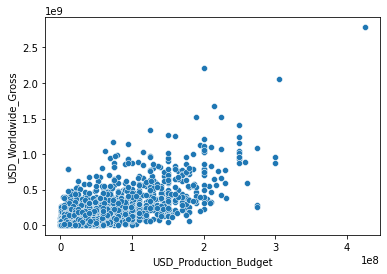

In [16]:
sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

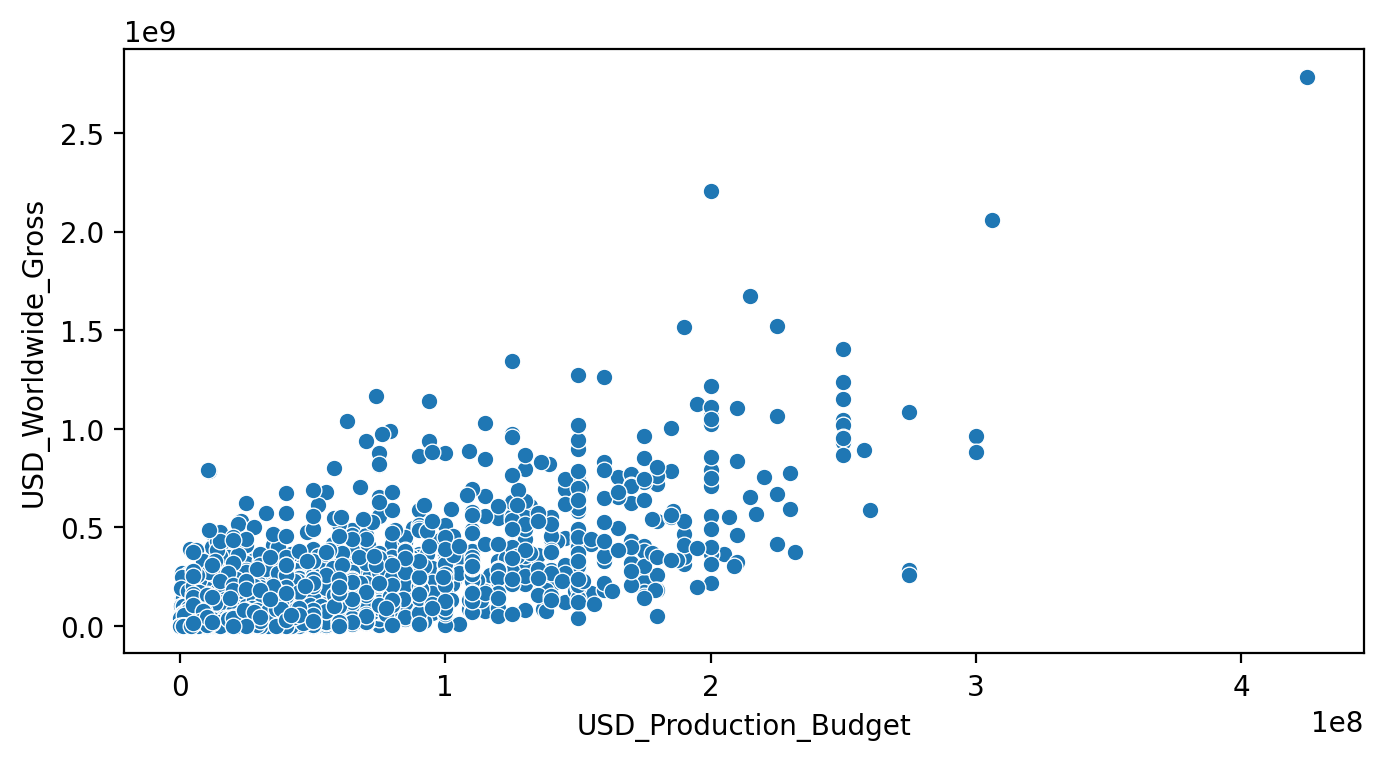

In [17]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')
plt.show()

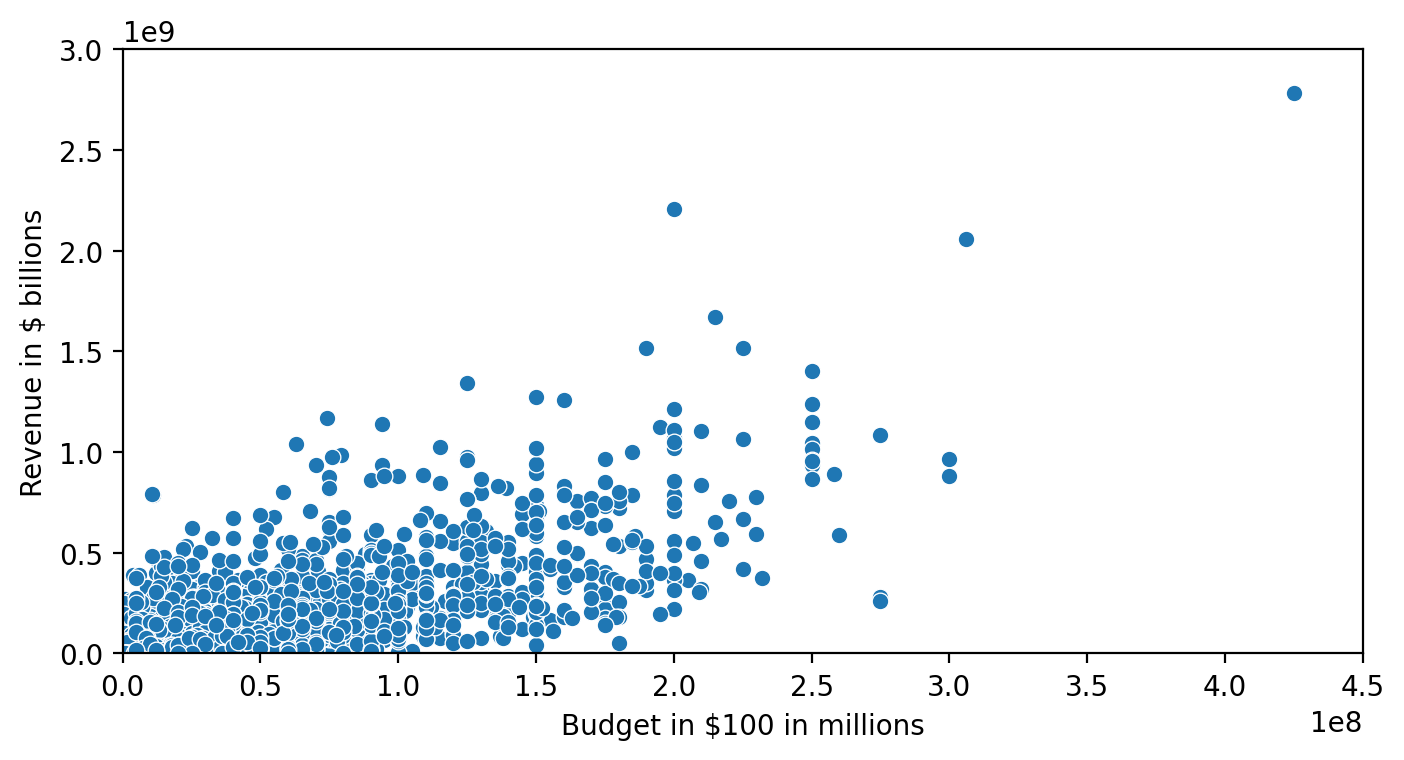

In [18]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000), xlim=(0,450000000), ylabel='Revenue in $ billions', xlabel='Budget in $100 in millions')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



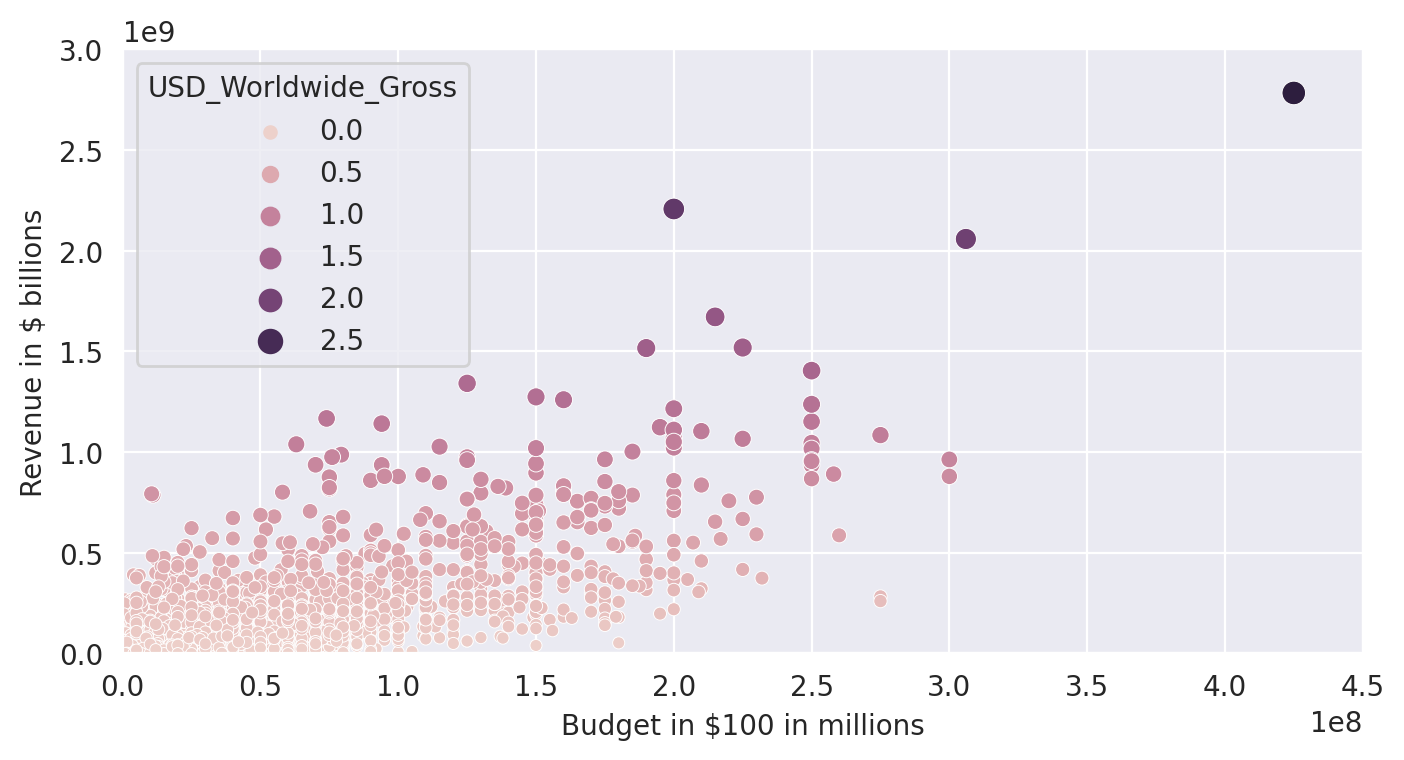

In [19]:
plt.figure(figsize=(8,4), dpi=200)

# Set styling on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000), xlim=(0,450000000), ylabel='Revenue in $ billions', xlabel='Budget in $100 in millions')

plt.show()

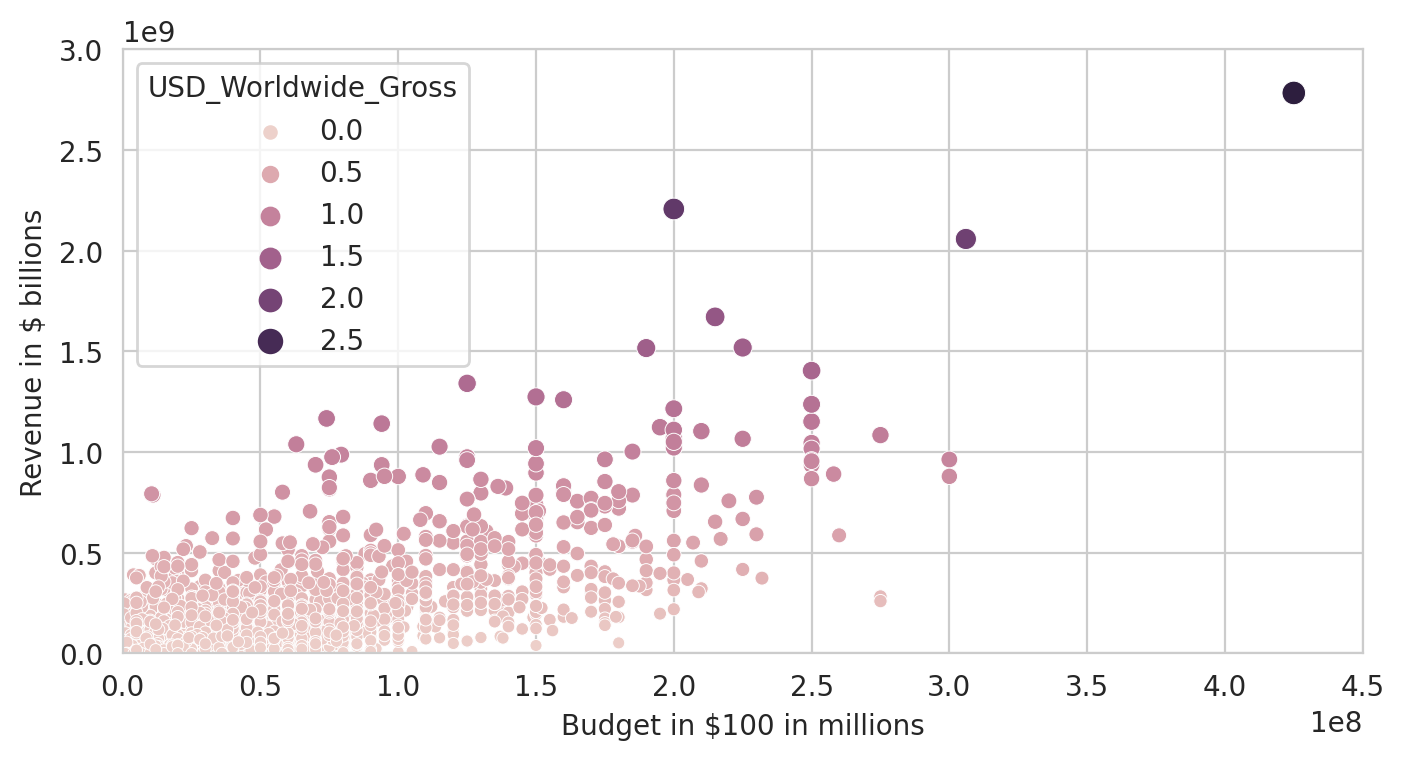

In [20]:
plt.figure(figsize=(8,4), dpi=200)

# Set styling on a single chart
with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000), xlim=(0,450000000), ylabel='Revenue in $ billions', xlabel='Budget in $100 in millions')

plt.show()

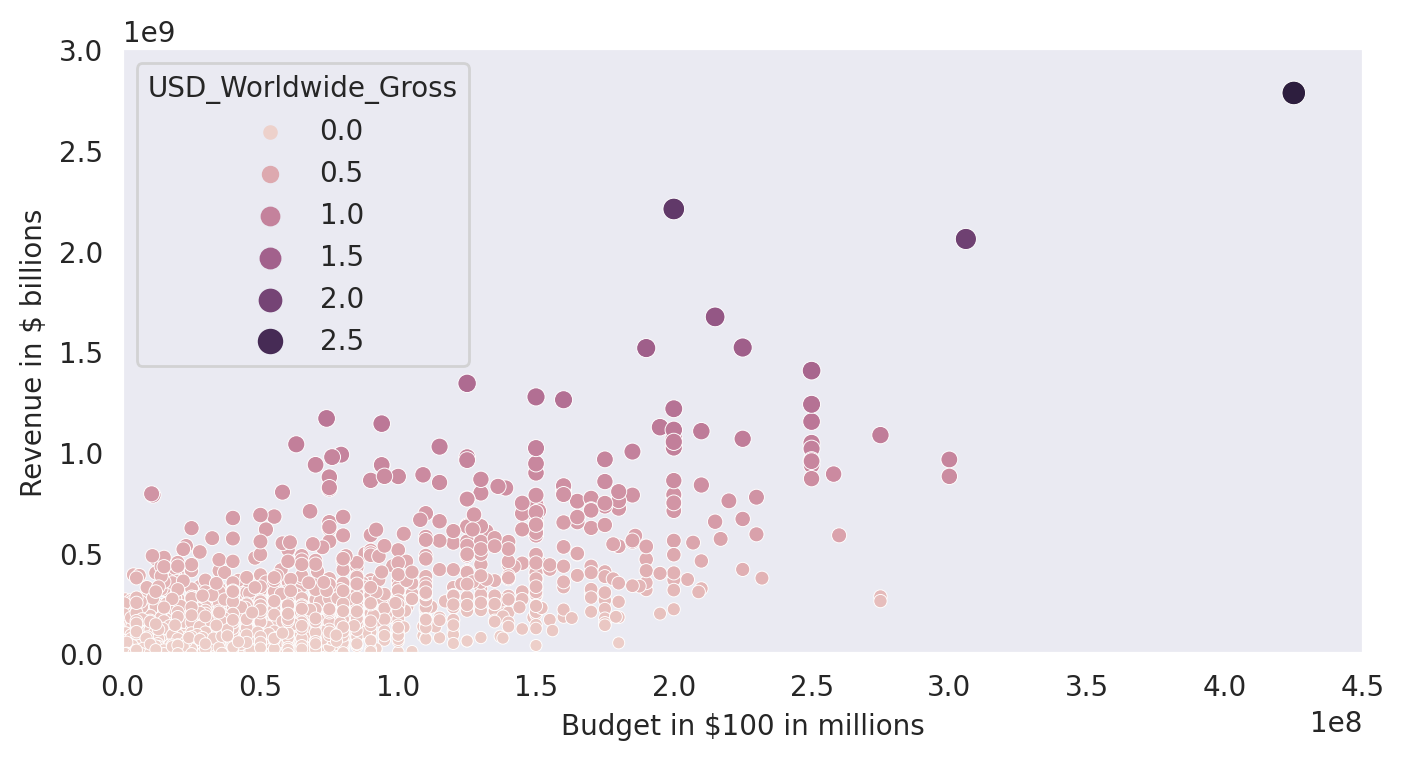

In [21]:
plt.figure(figsize=(8,4), dpi=200)

# Set styling on a single chart
with sns.axes_style('dark'):
    ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000), xlim=(0,450000000), ylabel='Revenue in $ billions', xlabel='Budget in $100 in millions')

plt.show()

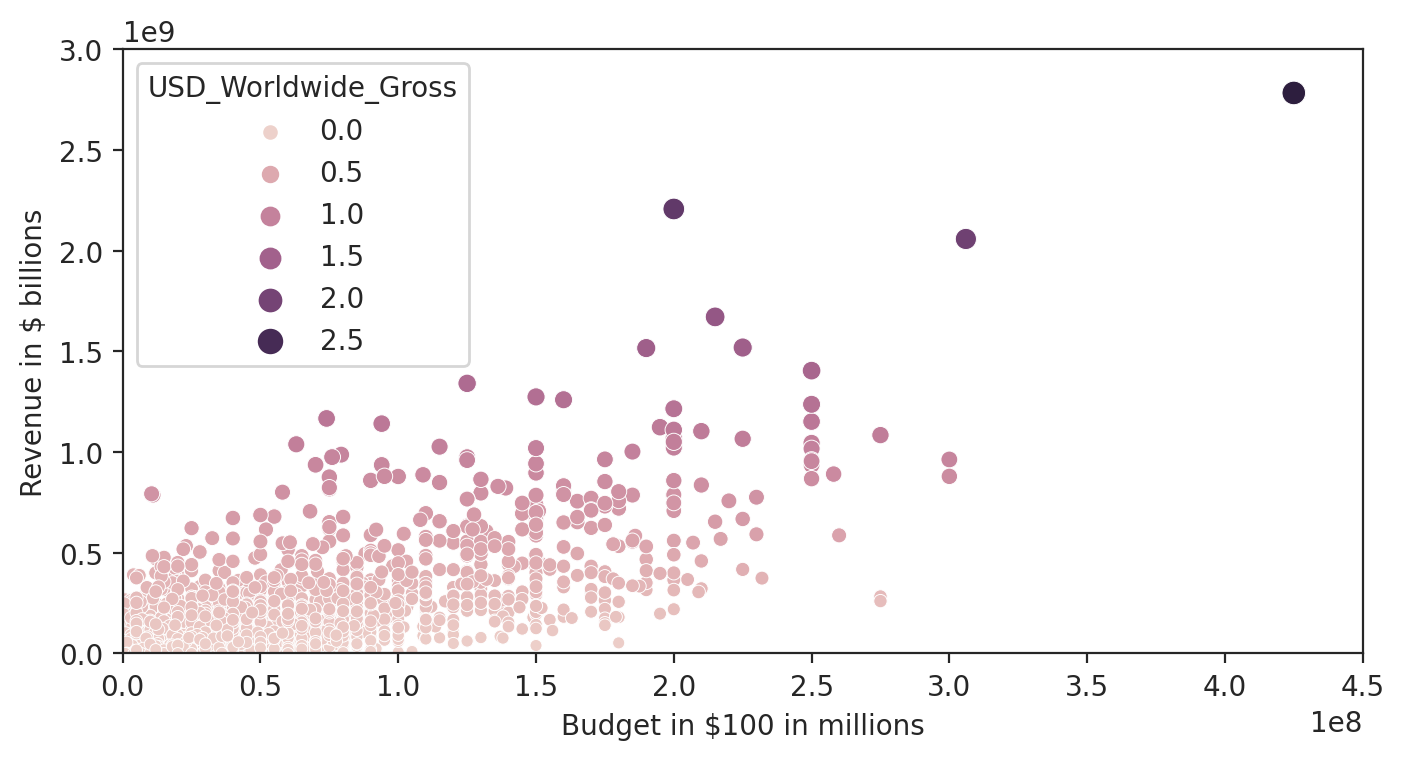

In [22]:
plt.figure(figsize=(8,4), dpi=200)

# Set styling on a single chart
with sns.axes_style('ticks'):
    ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000), xlim=(0,450000000), ylabel='Revenue in $ billions', xlabel='Budget in $100 in millions')

plt.show()

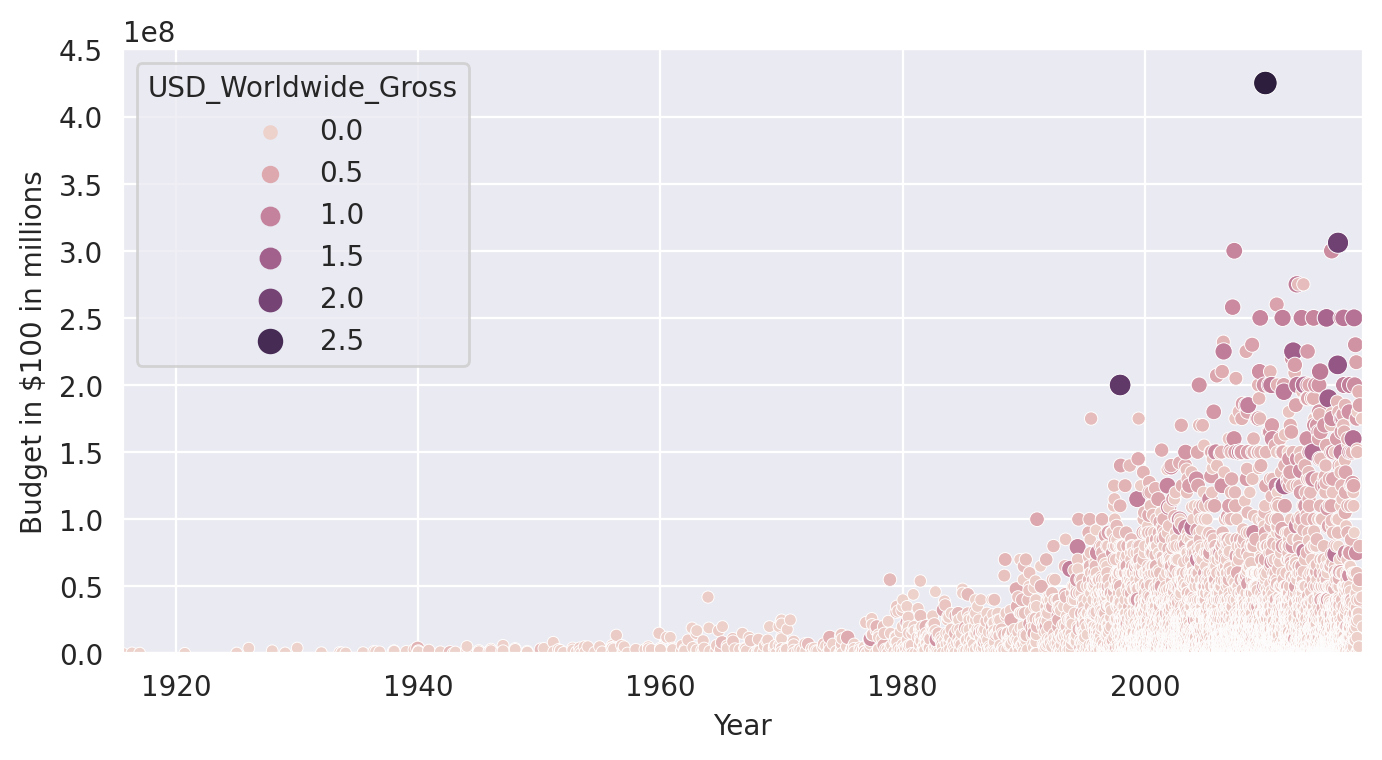

In [23]:
plt.figure(figsize=(8,4), dpi=200)

# Set styling on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean, x='Release_Date', y='USD_Production_Budget', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

ax.set(ylim=(0,450000000), xlim=(data_clean['Release_Date'].min(), data_clean['Release_Date'].max()), ylabel='Budget in $100 in millions', xlabel='Year')

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [24]:
dates = pd.DatetimeIndex(data_clean['Release_Date'])
print(dates.year)
decade = (dates.year // 10) * 10
data_clean['Decade'] = decade
data_clean

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [25]:
old_films = data_clean.loc[(data_clean['Decade'] < 1970)]
new_films = data_clean.loc[(data_clean['Decade'] >= 1970)]

# How many films were released prior to 1970?
print(len(old_films))

# What was the most expensive film made prior to 1970?
old_films.sort_values('USD_Production_Budget', ascending=False).head(1)

153


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


# Seaborn Regression Plots

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

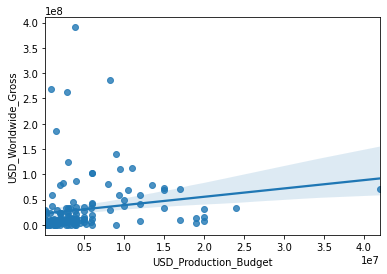

In [26]:
sns.regplot(data=old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross')

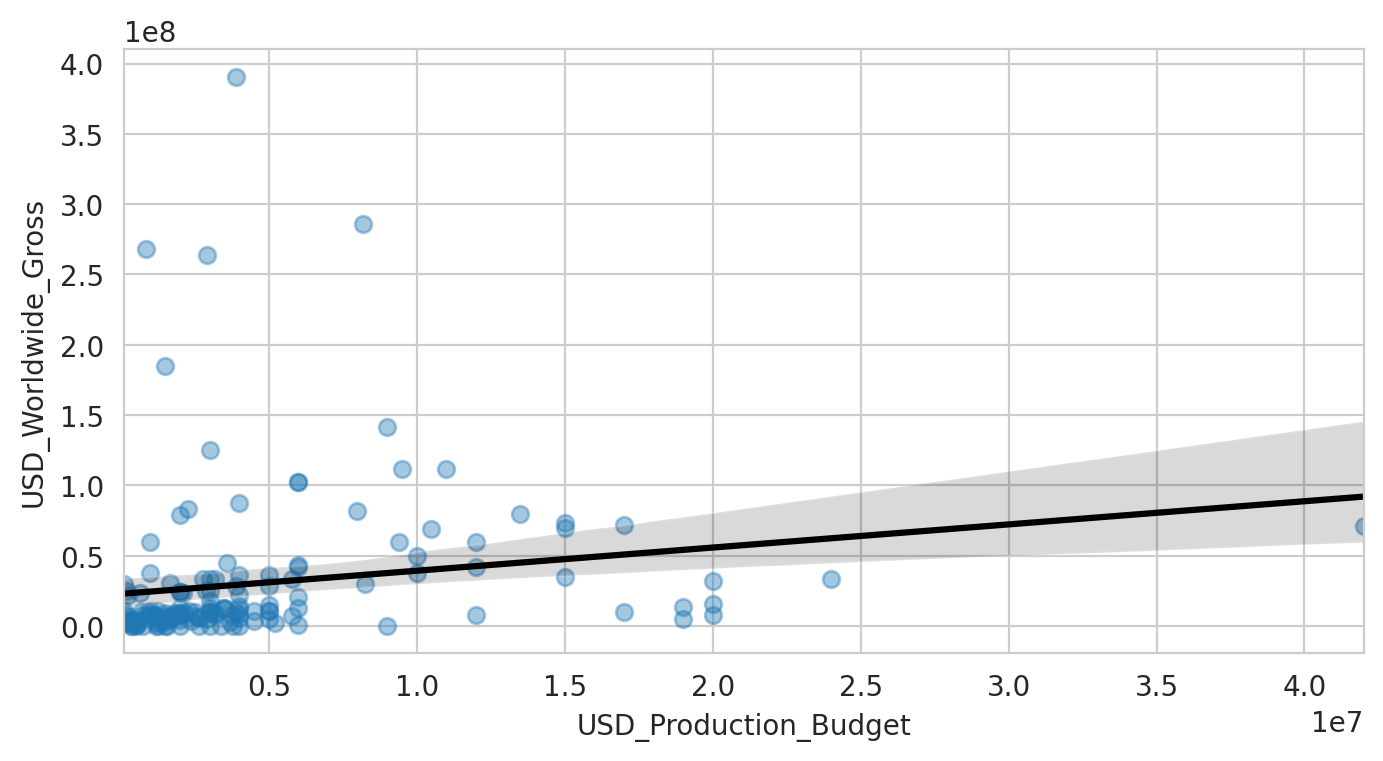

In [27]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws= {'alpha': 0.4}, line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

[(0.0, 3000000000.0),
 (0.0, 450000000.0),
 Text(0, 0.5, 'Revenue in billions'),
 Text(0.5, 0, 'Budget in millions')]

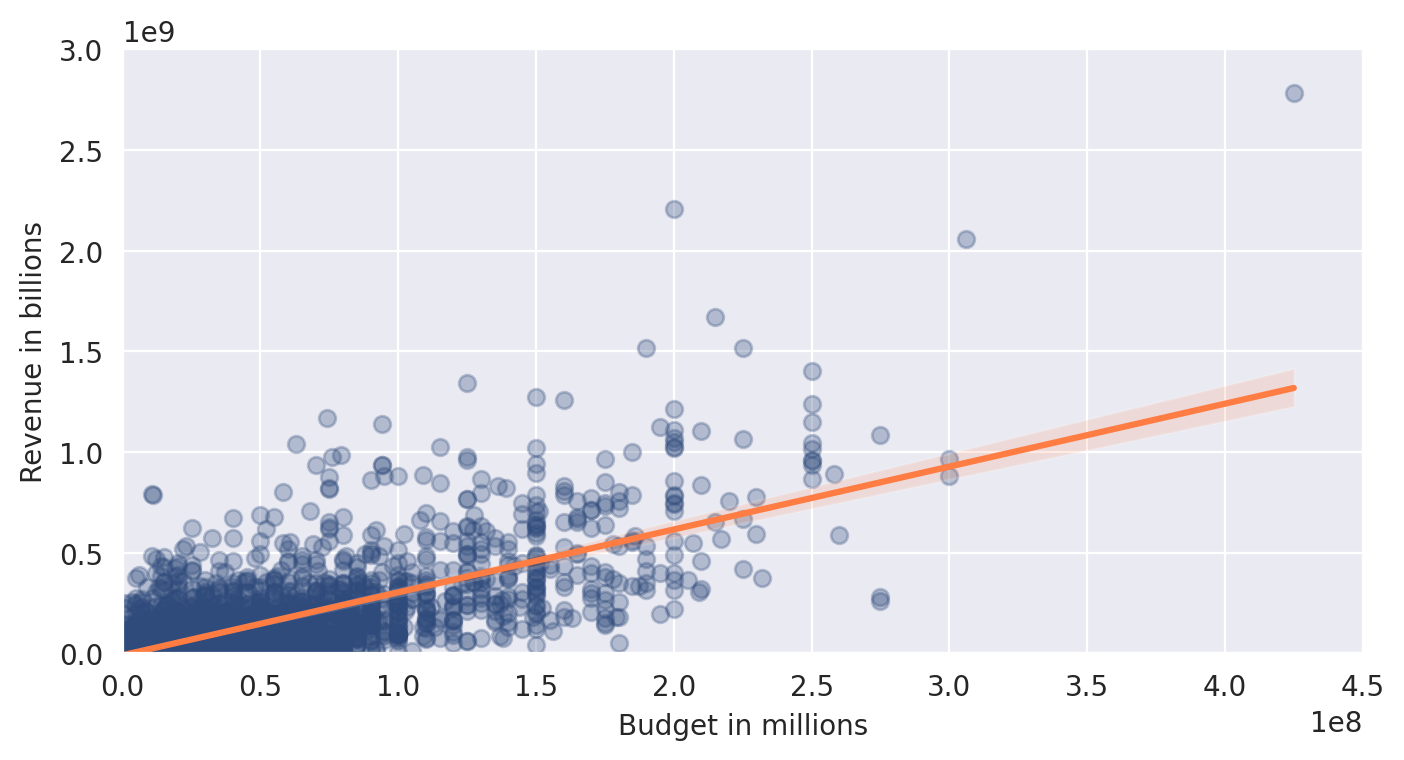

In [28]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films, x='USD_Production_Budget', y='USD_Worldwide_Gross', color='#2f4b7c', scatter_kws= {'alpha': 0.3}, line_kws = {'color': '#ff7c43'})
    
ax.set(ylim=(0, 3000000000), xlim=(0,450000000), ylabel='Revenue in billions', xlabel='Budget in millions')



# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [29]:
regression = LinearRegression()

# Explanatory Variable(s) or Features(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

regression.fit(X, y)

# Theta zero
print(regression.intercept_)

# Theta one
print(regression.coef_)

# R-squared
regression.score(X, y)

[-8650768.00661026]
[[3.12259592]]


0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [30]:
# Explanatory Variable(s) or Features(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

regression.fit(X, y)

# Theta zero
print(regression.intercept_)

# Theta one
print(regression.coef_)

# R-squared
regression.score(X, y)

[22821538.63508038]
[[1.64771314]]


0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [31]:
revenue = regression.intercept_ + regression.coef_ * 350000000
print(f"The estimated revenue for a $350 film is around ${round(revenue[0][0], -6):.10}")

The estimated revenue for a $350 film is around $600000000.0
